<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/TensorFlow/blob/master/Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
x_data=np.linspace(0,10,1000)

In [0]:
noise=np.random.randn(len(x_data))

### Y = Mx + C
1.   M = 0.5
2.   C = 1




In [0]:
y_data=(0.5*x_data)+5+noise


In [0]:
x_data=pd.DataFrame(data=x_data, columns=['X'])

In [0]:
y_data=pd.DataFrame(data=y_data, columns=['Y'])


In [53]:
data=pd.concat([x_data, y_data], axis=1)
data.head()

,X,Y
0,0.00000,5.694942
1,0.01001,5.983556
2,0.02002,3.755013
3,0.03003,5.140829
4,0.04004,6.714023


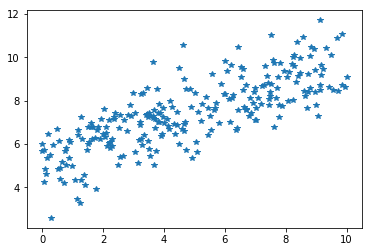

In [54]:
my_data=data.sample(250)
plt.plot(my_data['X'], my_data['Y'], '*')

In [0]:
batch_size=10

In [0]:
xph=tf.placeholder(tf.float32, [batch_size])
yph=tf.placeholder(tf.float32, [batch_size])

In [58]:
np.random.rand(2)

array([0.91858038, 0.05240777])

In [0]:
m=tf.Variable([0.92])
c=tf.Variable([0.05])

In [71]:
y_model=m*xph+c
y_model

<tf.Tensor 'add_2:0' shape=(10,) dtype=float32>

In [0]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [73]:
error

<tf.Tensor 'Sum_1:0' shape=() dtype=float32>

In [0]:
optimiser=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimiser.minimize(error)

In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as session:
  session.run(init)
  batches=100
  for i in range(batches):
    rand_int=np.random.randint(len(x_data), size=batch_size)
    feed={xph: data.X[rand_int], yph: data.Y[rand_int]}
    session.run(train, feed_dict=feed)
    
  model_m, model_c=session.run([m, c])

In [90]:
model_m, model_c

(array([0.92434853], dtype=float32), array([2.005941], dtype=float32))

In [0]:
y_hat = data.X*model_m + model_c

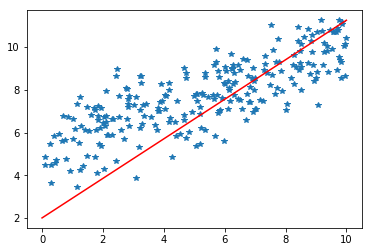

In [95]:
my_data=data.sample(250)
plt.plot(my_data['X'], my_data['Y'], '*')

plt.plot(data.X, y_hat,'r' )